<a href="https://colab.research.google.com/github/muregad/Machine-Learning-NETW-1013-/blob/main/GUC_KNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
df = pd.read_csv("drive/MyDrive/Classified Data" , usecols=[i for i in range(1,12)])
df_np = df.to_numpy()

In [60]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [61]:
scaler = StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [62]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [63]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [64]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.50, random_state=101)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [66]:
pred = knn.predict(X_test)

### Evaluation of classification quality using Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred)
conf_matrix

array([[233,  17],
       [ 24, 226]])

***Print Misclassification error rate***

In [73]:
print(f"Test Error: {100*np.sum(y_test != pred)/y_test.shape[0]}% \nTest Accuracy: {100*np.sum(y_test == pred)/y_test.shape[0]}%")

Test Error: 8.2% 
Test Accuracy: 91.8%


# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

boxplots = []
means = []
for k in range (1 , 21):
  knn = KNeighborsClassifier(n_neighbors=k)
  cv = KFold(n_splits=10, random_state=1, shuffle=True)
  scores = cross_val_score(knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  boxplots.append(1 - scores)
  means.append(np.mean(1 - scores))

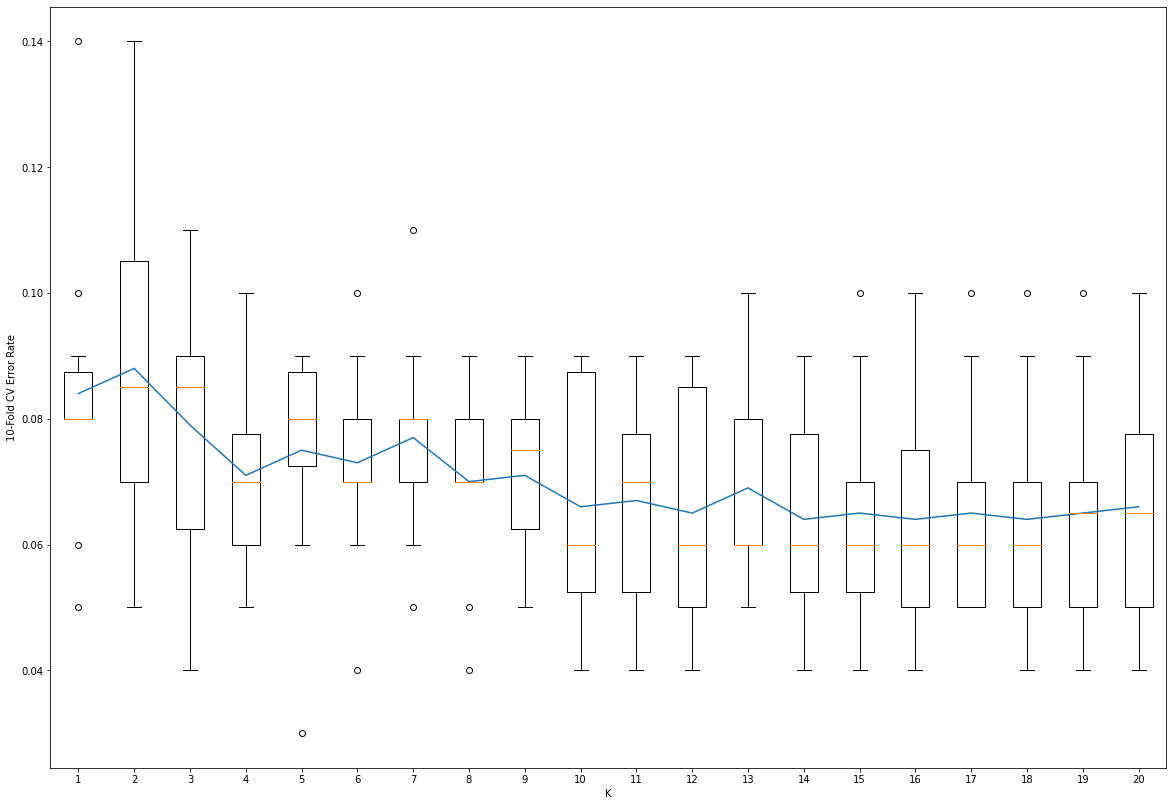

In [84]:
fig = plt.figure(figsize =(20, 14))
plt.boxplot(boxplots)
plt.plot(np.arange(1 , 21), means)
plt.xlabel("K")
plt.ylabel("10-Fold CV Error Rate")
plt.show()

In [85]:
best_k = np.argmin(means) + 1
best_accuracy = 1 - means[best_k - 1]
best_k, best_accuracy

(14, 0.9359999999999999)

**K = 14 is the K that gives the best accuracy which is 93.6% estimated by 10-fold cross validation estimator**